In [103]:
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [268]:
tom_swayer_file = open("shakespeare.txt", "r", encoding="utf8")
tom_swayer = tom_swayer_file.read()
tom_swayer_lower = tom_swayer.lower()

special_chars = re.compile('[`~!@#$%^&*()+={}|\[\]:";<>?,\./“”]')

tom_swayer_lower = special_chars.sub("", tom_swayer_lower)

tokens_list = word_tokenize(tom_swayer_lower)
tokens_list = [i for i in tokens_list if len(re.findall('[a-z0-9]', i))!=0]
tokens = len(tokens_list)

tom_swayer_file.close()

token_count = {}
counter = 0
unique_words = []
for i in tokens_list:
    if (i in token_count.keys()):
        token_count[i] += 1
    else:
        token_count[i] = 1
    
    if (counter%500 == 0):
        unique_words.append(len(token_count.keys()))
    counter += 1
        
unique_words = unique_words[1:]
types = len(token_count.keys())
ttr = types/tokens

print (tokens, types, ttr)
    

920565 30318 0.03293412197943654


In [269]:
token_ranks = []
for i in token_count:
    token_ranks.append([i, token_count[i]])
    
token_ranks.sort(key = lambda x:x[1], reverse = True)

print (token_ranks)

[['the', 27594], ['and', 26706], ['i', 22445], ['to', 19177], ['of', 18171], ['a', 14483], ['you', 13767], ['my', 12461], ['that', 11492], ['in', 10984], ['is', 10976], ['not', 9448], ['for', 8236], ['with', 7991], ['me', 7705], ['it', 7687], ["'s", 7451], ["'d", 7199], ['be', 7063], ['your', 6871], ['his', 6850], ['this', 6816], ['he', 6645], ['but', 6256], ['as', 5949], ['have', 5882], ['thou', 5470], ['so', 5236], ['him', 5151], ['will', 4966], ['what', 4773], ['by', 4403], ['thy', 4030], ['all', 3898], ['are', 3846], ['her', 3833], ['no', 3766], ['do', 3744], ['we', 3605], ['shall', 3583], ['if', 3491], ['thee', 3158], ['or', 3121], ['on', 3069], ['our', 3067], ['lord', 3038], ['king', 3003], ['good', 2793], ['now', 2761], ['sir', 2724], ['from', 2644], ['o', 2634], ['they', 2525], ['at', 2508], ['come', 2495], ['she', 2392], ['was', 2380], ["'ll", 2373], ['let', 2344], ['which', 2312], ['here', 2304], ['would', 2290], ['more', 2281], ['then', 2212], ['there', 2182], ['am', 2160], 

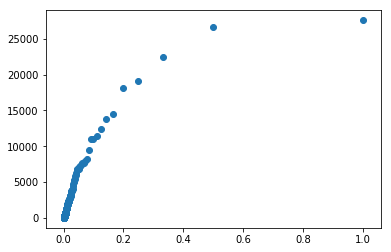

In [315]:
plt.scatter([i**-1 for i in range(1,types+1)], [token_ranks[i][1] for i in range(types)])
plt.show()

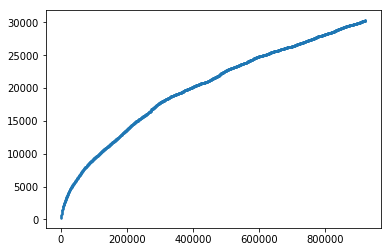

In [271]:
plt.scatter([(i+1)*500 for i in range(len(unique_words))], [i for i in unique_words], s=2)
plt.show()

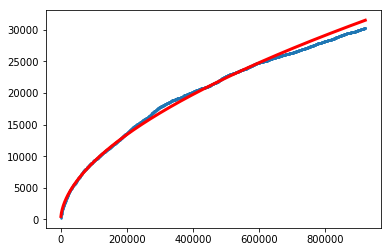

In [272]:
model = linear_model.LinearRegression()
model.fit([[math.log((i+1)*500)] for i in range(len(unique_words))], [math.log(i) for i in unique_words])

k = math.exp(model.intercept_)
b = model.coef_

prediction = [k*(((i+1)*500)**b[0]) for i in range(len(unique_words))]
plt.scatter([(i+1)*500 for i in range(len(unique_words))], [i for i in unique_words], s=2)
plt.plot([(i+1)*500 for i in range(len(unique_words))] ,prediction, color='red', linewidth=3)

plt.show()


In [273]:
print (k, b)

14.662214757638907 [0.5586976]


In [274]:
meanings_file = open("words.txt", "r", encoding="utf8")
meanings = meanings_file.readlines()

meanings = [i for i in meanings if (i.isupper() or i[0].isnumeric())]
token_meanings = [[token_ranks[i][0],token_ranks[i][1],i+1] for i in range(25)] + [[token_ranks[i*100][0],token_ranks[i*100][1],i*100+1] for i in range(1, int(len(token_ranks)/100))]


for i in range(len(token_meanings)):
    word = token_meanings[i][0]
    f = 0
    total = 0
    counter = 0
    for line in meanings:
        if (line.split() != []):
            if (f == 1):
                if (re.match('[0-9].', line.split()[0]) is not None):
                    counter += 1
                elif (len(re.findall(r'[a-z0-9]', line)) == 0):
                    f = 0
                    if (counter == 0):
                        counter = 1
                    total += counter
                    counter = 0
                if (word.upper() == line.replace(";", "").strip()):
                    f = 1
                if (f == 0):
                    break
            if (word.upper() == line.replace(";", "").strip()):
                f = 1

    token_meanings[i].append(total)

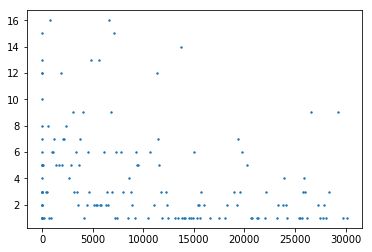

In [314]:
token_meanings = [i for i in token_meanings if i[3] != 0]
rank = [i[2] for i in token_meanings]
meanings = [i[3] for i in token_meanings]

plt.scatter(rank, meanings, s=2)
plt.show()

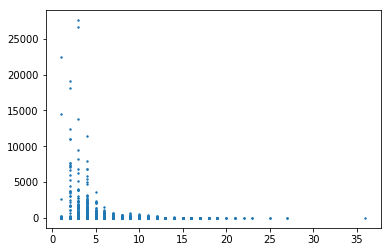

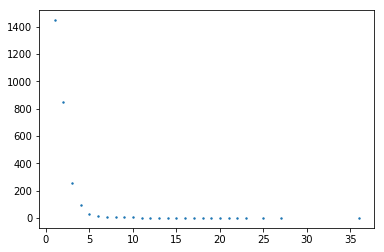

In [310]:
length = [len(i[0]) for i in token_ranks]


freq = {}
for i in token_ranks:
    if (len(i[0]) in freq.keys()):
        freq[len(i[0])].append(i)
    else:
        freq[len(i[0])] = [i]

avg_freq = []
for i in freq:
    s = 0
    for j in range(len(freq[i])):
        s = s + freq[i][j][1]
    s = s/len(freq[i])
    avg_freq.append([i, s])
        
plt.scatter(length, [i[1] for i in token_ranks], s=2)
plt.show()
plt.scatter([i for i,j in avg_freq], [j for i,j in avg_freq], s=2)
plt.show()